In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
print('Imported')

Imported


In [39]:
def plot_series(time, series, format = "-", start=0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [40]:
def trend(time, slope = 0):
    return time*slope

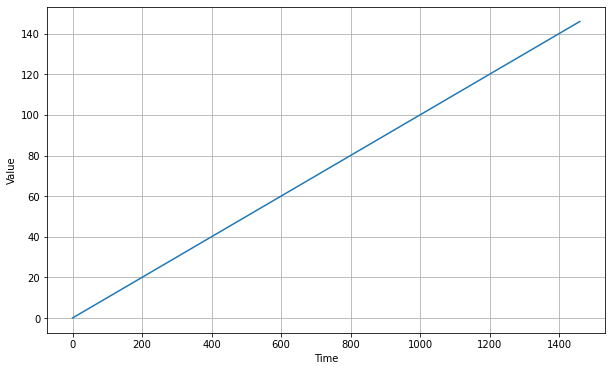

In [41]:
time = np.arange(4*365+1)
baseline = 10
trend = trend(time, slope = .1)

plt.figure(figsize = (10,6))
plot_series(time, trend)
plt.show()

In [42]:
def seasonal_pattern(season_time):
    return np.where(season_time <.4, 
                    np.cos(season_time*2*np.pi),
                    1/(np.exp(3*season_time)))

def seasonality(time, period, amplitude = 1, phase = 0):
    season_time = ((time+phase) % period) / period
    return amplitude*seasonal_pattern(season_time)

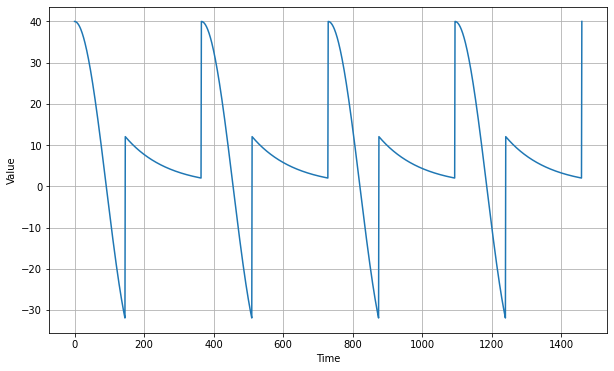

In [37]:
baseline = 10
amplitude = 40
series = seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize = (10,6))
plot_series(time, series)
plt.show()

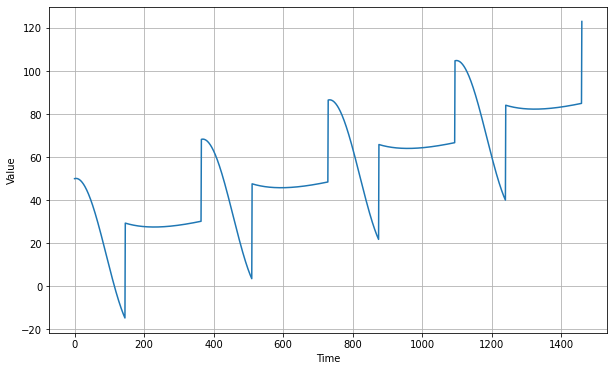

In [45]:
slope = .05
series = baseline + time*slope + seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize = (10,6))
plot_series(time, series)
plt.show()

In [52]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

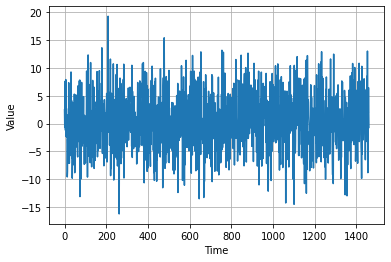

<Figure size 720x432 with 0 Axes>

In [53]:
noise_level = 5
noise = white_noise(time, noise_level = noise_level, seed = 42)
plot_series(time, noise)
plt.figure(figsize = (10,6))
plt.show()

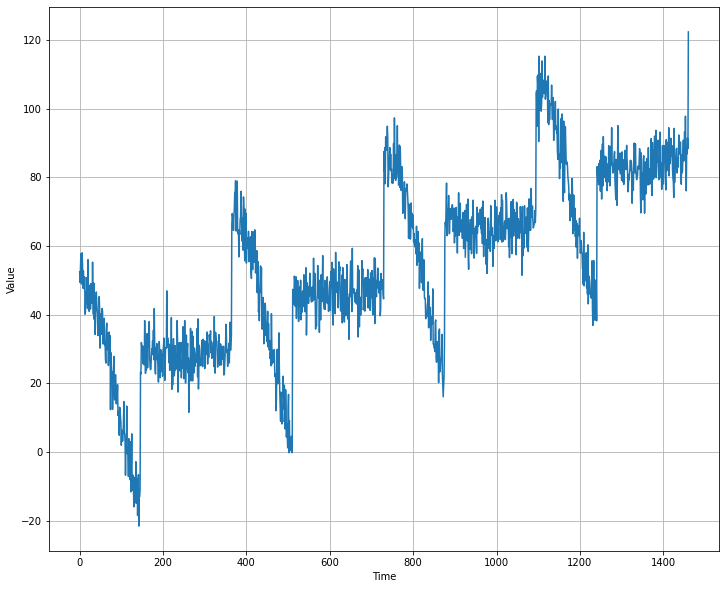

In [54]:
series = series + noise
plt.figure(figsize = (12,10))
plot_series(time, series)
plt.show()

In [55]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [56]:
def autocorrelation(time, amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    phiOne = .5
    phiTwo = -.1
    ar = rnd.randn(len(time)+50)
    ar[:50] = 100
    for step in range(50, len(time)+50):
        ar[step] = ar[step] + phiOne * ar[step - 50]
        ar[step] = ar[step] + phiTwo * ar[step - 33]
    return ar[50:] * amplitude

In [57]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    φ = 0.8
    ar = rnd.randn(len(time) + 1)
    for step in range(1, len(time) + 1):
        ar[step] += φ * ar[step - 1]
    return ar[1:] * amplitude

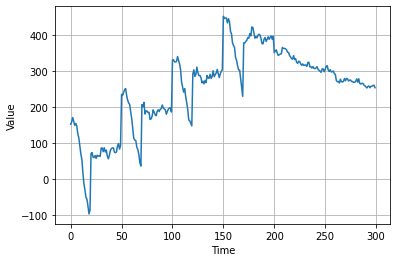

In [59]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + time*2
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + time*-1 + 550
series[200:] = series2[200:]
#series += noise(time, 30)
plot_series(time[:300], series[:300])
plt.show()

In [64]:
def impulses(time, num_pulses, amplitude = 1, seed = None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size = 10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] = series[index] + rnd.rand() * amplitude
    return series

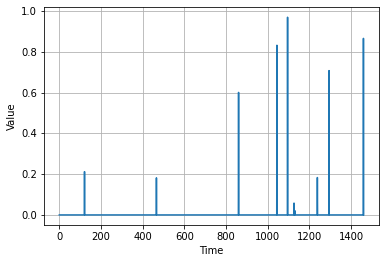

In [67]:
imps = impulses(time, 5, seed=42)
plot_series(time, imps)

In [68]:
def autocorrelation(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
                ar[step] += φ * ar[step - lag]
    return ar

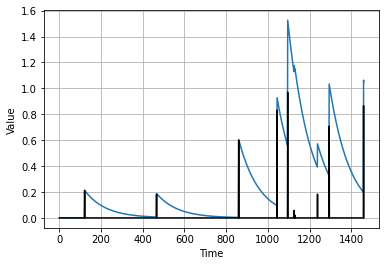

In [73]:
signal = impulses(time, 10, seed = 42)
series = autocorrelation(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time,signal,'k-')
plt.show()

In [93]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order = (5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2362.673
Method:                       css-mle   S.D. of innovations              0.048
Date:                Fri, 06 Aug 2021   AIC                          -4711.346
Time:                        23:07:02   BIC                          -4674.343
Sample:                             1   HQIC                         -4697.542
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.585      0.559      -0.002       0.003
ar.L1.D.y     -0.0108      0.026     -0.412      0.680      -0.062       0.040
ar.L2.D.y     -0.0100      0.030     -0.339      0.7

In [95]:
x = model.predict()

ValueError: x and y must have same first dimension, but have shapes (1461,) and (1460,)

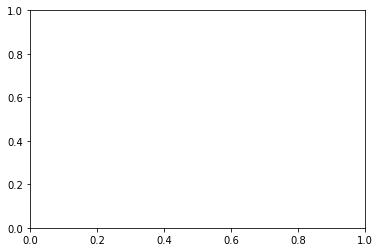

In [96]:
plot_series(time,x)